In [3]:
import pandas as pd

In [35]:
df=pd.read_csv('Finaldataset.csv')
df.head

<bound method NDFrame.head of        severity_class  ev_year_1.0  ev_year_2.0  ev_year_3.0  ev_year_4.0  \
0                   1          1.0          0.0          0.0          0.0   
1                   4          1.0          0.0          0.0          0.0   
2                   5          1.0          0.0          0.0          0.0   
3                   4          1.0          0.0          0.0          0.0   
4                   4          1.0          0.0          0.0          0.0   
...               ...          ...          ...          ...          ...   
27398               4          NaN          NaN          NaN          NaN   
27399               4          NaN          NaN          NaN          NaN   
27400               4          NaN          NaN          NaN          NaN   
27401               1          NaN          NaN          NaN          NaN   
27402               4          NaN          NaN          NaN          NaN   

       ev_year_5.0  ev_year_6.0  ev_year_7.0 

In [5]:
from scipy import stats
print(df.describe())

       severity_class   ev_year_1.0   ev_year_2.0   ev_year_3.0   ev_year_4.0  \
count    27403.000000  25126.000000  25126.000000  25126.000000  25126.000000   
mean         4.625698      0.071161      0.068057      0.068813      0.070604   
std          1.368654      0.257099      0.251849      0.253141      0.256168   
min          1.000000      0.000000      0.000000      0.000000      0.000000   
25%          4.000000      0.000000      0.000000      0.000000      0.000000   
50%          4.000000      0.000000      0.000000      0.000000      0.000000   
75%          5.000000      0.000000      0.000000      0.000000      0.000000   
max          9.000000      1.000000      1.000000      1.000000      1.000000   

        ev_year_5.0   ev_year_6.0   ev_year_7.0   ev_year_8.0   ev_year_9.0  \
count  25126.000000  25126.000000  25126.000000  25126.000000  25126.000000   
mean       0.070047      0.059341      0.057470      0.056913      0.055242   
std        0.255231      0.236266

In [6]:
column_names = ['ev_time', 'apt_dist', 'apt_elev', 'sky_nonceil_ht', 'sky_ceil_ht', 'vis_sm', 'wx_temp', 
                'wx_dew_pt', 'wind_dir_deg', 'wind_vel_kts', 'gust_kts', 'altimeter', 'dec_latitude', 
                'dec_longitude', 'cert_max_gr_wt', 'afm_hrs_last_insp', 'afm_hrs', 'crew_age']
Q1 = df[column_names].quantile(0.25)  # 1st quartile (25th percentile)
Q3 = df[column_names].quantile(0.75)  # 3rd quartile (75th percentile)
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_iqr = df[~((df[column_names] < lower_bound) | (df[column_names] > upper_bound)).any(axis=1)]
print("Data after removing outliers using IQR method:\n", df_no_outliers_iqr)

Data after removing outliers using IQR method:
        severity_class  ev_year_1.0  ev_year_2.0  ev_year_3.0  ev_year_4.0  \
4                   4          1.0          0.0          0.0          0.0   
15                  2          1.0          0.0          0.0          0.0   
43                  4          1.0          0.0          0.0          0.0   
49                  5          1.0          0.0          0.0          0.0   
53                  5          1.0          0.0          0.0          0.0   
...               ...          ...          ...          ...          ...   
27398               4          NaN          NaN          NaN          NaN   
27399               4          NaN          NaN          NaN          NaN   
27400               4          NaN          NaN          NaN          NaN   
27401               1          NaN          NaN          NaN          NaN   
27402               4          NaN          NaN          NaN          NaN   

       ev_year_5.0  ev_year

In [7]:
x=df.drop(['severity_class'],axis=1)
y=df['severity_class']

In [8]:
y.value_counts()

severity_class
4    15725
5     4820
6     2531
7     2065
1      907
8      640
9      363
2      233
3      119
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

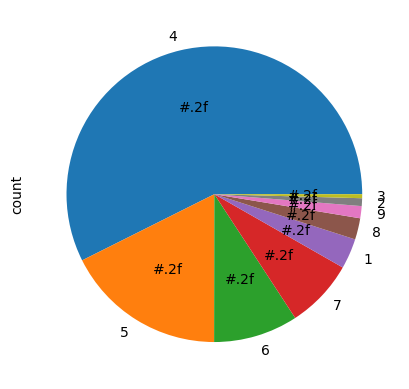

In [10]:
y.value_counts().plot.pie(autopct='#.2f')

In [13]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = {
    1: 907,   # Class '1' will keep 907 samples
    2: 233,   # Class '2' will keep 233 samples
    3: 119,   # Class '3' will keep 119 samples
    4: 2000,  # Class '4' will reduce to 2000 samples
    5: 1500,  # Class '5' will reduce to 1500 samples
    6: 1200,  # Class '6' will reduce to 1200 samples
    7: 1000,  # Class '7' will reduce to 1000 samples
    8: 640,   # Class '8' will keep 640 samples
    9: 363    # Class '9' will keep 363 samples
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
x_resampled, y_resampled = rus.fit_resample(x, y)
print(pd.Series(y_resampled).value_counts())

severity_class
4    2000
5    1500
6    1200
7    1000
1     907
8     640
9     363
2     233
3     119
Name: count, dtype: int64


In [36]:
output_filename='data.csv'
df.to_csv(output_filename, index=False)
print(f"Data saved to {output_filename}")

Data saved to data.csv
